<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/04_2_Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [6]:
# 확률적 경사 하강법을 제공하는 사이킷런의 대표적 분류 클래스 
from sklearn.linear_model import SGDClassifier

In [8]:
# SGDClassifier의 객체를 만들 때는 2개의 배개변수를 사용
# loss는 손실함수의 종류, max_iter는 수행할 에포크 횟수를 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 과소적합, 훈련 횟수를 증가
# 'ConvergenceWarning' 경고문은 지정 반복 횟수, 즉 에포크 횟수가 부족함을 의미

0.773109243697479
0.775


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
# 모델을 이어서 훈련할 때에는 partial_fit() 메소드를 사용함, fit()과 사용법은 같으나 1에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


# 에포크와 과대적합, 과소적합

In [10]:
# partial_fit() 메소드만 사용하기 위해 훈련 세트에 있는 전체 클래스의 레이블을 np.unique() 메소드로 train_target에 있는 7개의 생선목록을 만들어 partial_fit()에 전달함
# 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [12]:
# 300번의 에포크 동안 훈련 진행
# 매 반복마다 훈련 세트와 테스트 세트의 점수를 train_score, test_score 리스트에 추가
for _ in range(0, 300):   # 파이썬에서는 _ 변수를 통해 나중에 사용하지 않고 버리는 값을 넣어둘 수 있다, 0~299까지의 숫자를 담을 임시 저장 용도로 사용
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

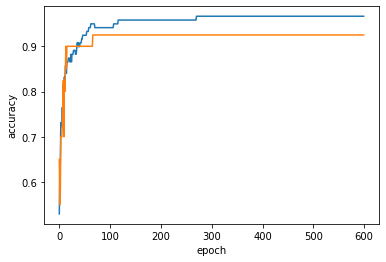

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 에포크 횟수가 100일 때 가장 적절한 것을 확인 가능

In [17]:
# SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 훈련을 멈춤, tol 매개변수는 이 때 향상될 최솟값을 지정, 즉 tol=None == 무조건 max_iter까지 반복
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [18]:
# loss 매개변수의 디폴트는 'hinge'로, 힌지손실은 '서포트 벡터 머신' 머신러닝 알고리즘을 위한 손실 함수
# 힌지 손실을 사용해 이를 다시 해보면
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 전체 소스 코드

# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 바꾸어 주세요.
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소적합

In [ ]:
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [ ]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

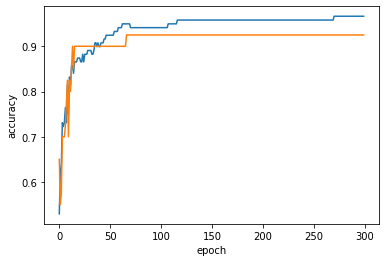

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# 총 정리

# 키워드
  ## 확률적 경사 하강법
        훈련 세트에서 샘플을 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘
        하나를 꺼내오는 확률적 경사 하강법, 여러 개인 미니배치 경사 하강법, 전체인 배치 경사 하강법이 있음

  ## 손실함수
        확률적 경사 하강법이 최적화할 대상으로, 이진 분류에는 로지스틱 회귀(이진 크로스엔트로피) 손실 함수, 다중 분류에는 크로스엔트로피 손실 함수를 사용함. 회귀 문제에는 평균 제곱 오차 손실함수를 사용함.
        이진 분류에서의 손실은
        양성 클래스의 경우 예측*타깃(1)*-1
        음성 클래스의 경우 (1-예측)*타깃(1)*-1
        이며, 이는 작을 수록 좋다.

  ## 에포크
        확률적 경사 하강법에서 전체 샘플을 모두 사용하는 한 번의 반복을 의미, 일반적을 ㅗ경사 하강법 알고리즘은 수십에서 수백 번의 에포크를 반복함


# 핵심 패키지와 함수
  ## 사이킷 런
  ### SGDClassifier
        확률적 경사 하강법을 사용한 분류 모델을 만듦
        loss 매개변수는 손실 함수의 종류를 지정하며 디폴트는 '서포트 벡터 머신'을 위한 'hinge'손실 함수임
        로지스틱 회귀에서는 확률의 범위인 0~1 사이에서 log가 음수를 취하므로 적합, 따라서  'log'로 지정

        penalty 매개변수를 통해 규제의 종류를 지정할 수 있음
        디폴트는 L2 규제를 위한 'l2'이며, alpha 매개변수를 통해 강도를 지정할 수 있음, alpha의 디폴트는 0.0001

        max_iter 매개변수는 에포크 횟수를 지정, 디폴트는 1000

        확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면 훈련을 멈춤
        tol 매개변수는 반복을 멈출 조건을 설정. 디폴트는 0.001
        n_iter_no_change 매개변수에서 지정한 에포크 동안 손실이 tol 만큼 줄어들지 않으면 알고리즘이 중단, 디폴트는 5
        즉 디폴트 값 기준으로 5번의 에포크가 동작할 동안 손실이 0.001 만큼 줄어들지 않으면 훈련을 멈춤


  ### SGDRegressor
        확률적 경사 하강법을 사용한 회귀 모델을 만듦
        loss 매개변수의 디폴트는 'squared_loss'이며 이외의 기능은 분류 모델과 동일


# 팁
  1. 판다스 데이터 프레임을 가져와 만듦
  2. Species 열을 타깃으로, 나머지 열을 입력 데이터로 사용
  3. train_test_split() 메소드로 훈련/테스트 세트 구분
  4. 표준화 전처리 *반드시 훈련 세트에서 학습한 통계 값으로 테스트 세트도 변환해야 함